In [1]:
%matplotlib inline

In [2]:
%matplotlib notebook
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = '1' #'0, 1, 2, 3'
#import multiprocessing as mp
#mp.set_start_method('forkserver')

In [3]:
import torch.nn.functional as F
import torch
torch.cuda.set_device(1)
import torch.nn as nn
from torch.nn.utils import weight_norm, spectral_norm
from tqdm import tqdm_notebook as tqdm
from collections import Counter
import numpy as np
import numpy as np 
from matplotlib import pyplot as plt
from torch.optim import *
from InvertibleResnet import *

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [   transforms.Pad(2),
        transforms.ToTensor(),     
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

In [5]:
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=True, num_workers=2)

In [6]:
#testnet = InvertibleResnetConv(1,32, list_num_blocks=(32,32,32)).cuda()

In [7]:
#b = testnet(next(iter(trainloader))[0].cuda(), return_logdet=True)

In [6]:
from torch.distributions import *
std = 1
ndim = 32*32
height,width = 32,32
n_bins = 5
pzes = []
logdets = []
losses = []
latent_numpys =[]
gaussian = Normal(0.0,std)
normal_np = gaussian.sample((20000,2)).numpy()

In [7]:
net = InvertibleResnetConv(1,32, list_num_blocks=(10,10,10)).cuda()
#net = torch.nn.DataParallel(net).cuda()
optim = Adam(net.parameters(), lr=0.001, eps=1e-4)

In [8]:
latent = net(testset[0][0].unsqueeze(0).cuda(), return_logdet=False)
fixed_z = torch.randn_like(latent).cuda() #[torch.randn_like(l[:1]).cuda() for l in latent]
print(fixed_z.shape)


torch.Size([1, 64, 4, 4])


<IPython.core.display.Javascript object>


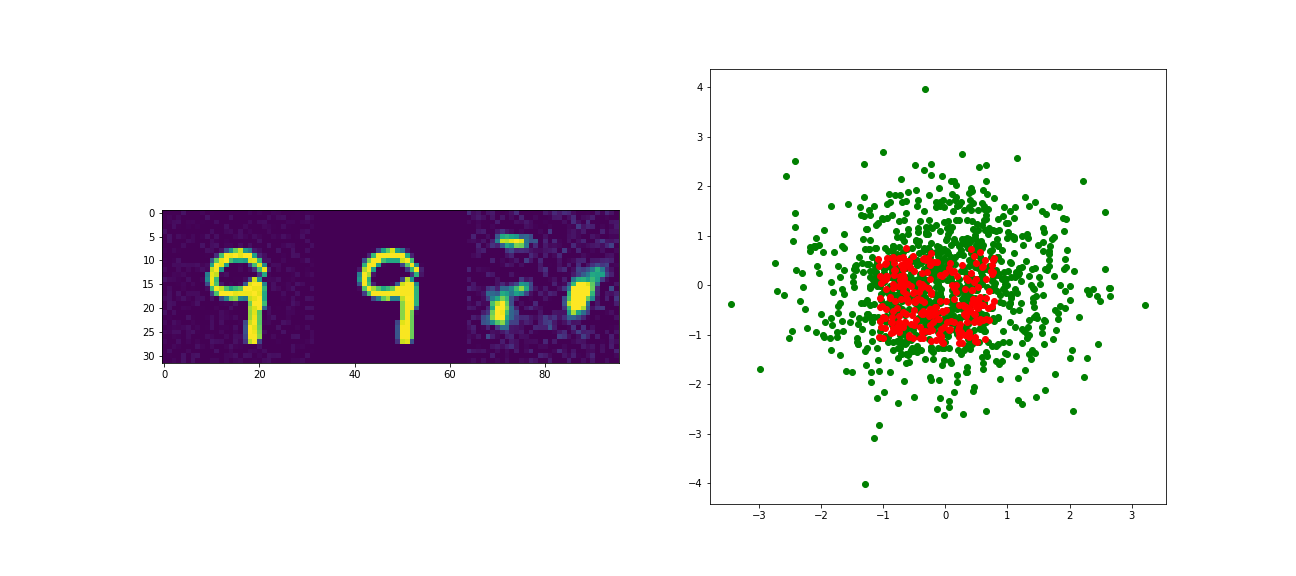

loss:1.8583, logdet:1.7222 pz:-1.4008 latentstd:0.8418 latentstdmax:2.0046 latentstdmin:0.3330
loss:1.1155, logdet:2.2241 pz:-1.3879 latentstd:0.9257 latentstdmax:1.5443 latentstdmin:0.6538
loss:1.0208, logdet:2.3238 pz:-1.4219 latentstd:0.9753 latentstdmax:1.5654 latentstdmin:0.6762
loss:0.9911, logdet:2.3348 pz:-1.4123 latentstd:0.9682 latentstdmax:1.5886 latentstdmin:0.7330
loss:0.9888, logdet:2.3395 pz:-1.4154 latentstd:0.9659 latentmean:-0.0052 recon_loss:0.0033


loss:0.9799, logdet:2.3506 pz:-1.4204 latentstd:0.9801 latentstdmax:1.6136 latentstdmin:0.6992
loss:0.9597, logdet:2.3684 pz:-1.4242 latentstd:0.9833 latentstdmax:1.5871 latentstdmin:0.7391
loss:0.9394, logdet:2.3729 pz:-1.4146 latentstd:0.9761 latentstdmax:1.5230 latentstdmin:0.7456
loss:0.9051, logdet:2.3986 pz:-1.4166 latentstd:0.9792 latentstdmax:1.5260 latentstdmin:0.7450
loss:0.9021, logdet:2.4014 pz:-1.4173 latentstd:0.9831 latentmean:-0.0023 recon_loss:0.0034


loss:0.8872, logdet:2.4136 pz:-1.4191 latentstd:0.9849 latentstdmax:1.4788 latentstdmin:0.7634
loss:0.8913, logdet:2.4110 pz:-1.4194 latentstd:0.9830 latentstdmax:1.4799 latentstdmin:0.7404
loss:0.9135, logdet:2.3984 pz:-1.4221 latentstd:0.9863 latentstdmax:1.5355 latentstdmin:0.7593
loss:0.8851, logdet:2.4197 pz:-1.4238 latentstd:0.9866 latentstdmax:1.5326 latentstdmin:0.7589
loss:0.9049, logdet:2.4006 pz:-1.4184 latentstd:0.9804 latentmean:0.0005 recon_loss:0.0034


loss:0.8941, logdet:2.4114 pz:-1.4217 latentstd:0.9865 latentstdmax:1.4946 latentstdmin:0.7444
loss:0.8674, logdet:2.4274 pz:-1.4192 latentstd:0.9848 latentstdmax:1.5292 latentstdmin:0.7640
loss:0.8722, logdet:2.4224 pz:-1.4175 latentstd:0.9841 latentstdmax:1.4702 latentstdmin:0.7170
loss:0.8772, logdet:2.4216 pz:-1.4202 latentstd:0.9872 latentstdmax:1.4419 latentstdmin:0.7693
loss:0.8783, logdet:2.4183 pz:-1.4176 latentstd:0.9863 latentmean:0.0039 recon_loss:0.0033


loss:0.8767, logdet:2.4315 pz:-1.4297 latentstd:0.9972 latentstdmax:1.4465 latentstdmin:0.7688
loss:0.8712, logdet:2.4300 pz:-1.4244 latentstd:0.9933 latentstdmax:1.4380 latentstdmin:0.8023
loss:0.8282, logdet:2.4528 pz:-1.4174 latentstd:0.9878 latentstdmax:1.4143 latentstdmin:0.7689
loss:0.8356, logdet:2.4479 pz:-1.4176 latentstd:0.9883 latentstdmax:1.3943 latentstdmin:0.7967
loss:0.8455, logdet:2.4447 pz:-1.4213 latentstd:0.9857 latentmean:0.0041 recon_loss:0.0033


loss:0.8311, logdet:2.4519 pz:-1.4186 latentstd:0.9899 latentstdmax:1.4161 latentstdmin:0.7873
loss:0.8218, logdet:2.4593 pz:-1.4195 latentstd:0.9911 latentstdmax:1.3761 latentstdmin:0.8122
loss:0.8166, logdet:2.4590 pz:-1.4156 latentstd:0.9875 latentstdmax:1.3536 latentstdmin:0.7969
loss:0.8301, logdet:2.4572 pz:-1.4231 latentstd:0.9953 latentstdmax:1.3801 latentstdmin:0.7695
loss:0.8234, logdet:2.4525 pz:-1.4137 latentstd:0.9843 latentmean:0.0101 recon_loss:0.0032


loss:0.8275, logdet:2.4614 pz:-1.4255 latentstd:0.9976 latentstdmax:1.3595 latentstdmin:0.7955
loss:0.8170, logdet:2.4612 pz:-1.4181 latentstd:0.9910 latentstdmax:1.3670 latentstdmin:0.8258
loss:0.8179, logdet:2.4657 pz:-1.4232 latentstd:0.9963 latentstdmax:1.3745 latentstdmin:0.7760
loss:0.8091, logdet:2.4631 pz:-1.4145 latentstd:0.9878 latentstdmax:1.3670 latentstdmin:0.8027
loss:0.8171, logdet:2.4598 pz:-1.4168 latentstd:0.9873 latentmean:0.0057 recon_loss:0.0034


loss:0.8296, logdet:2.4574 pz:-1.4229 latentstd:0.9955 latentstdmax:1.4066 latentstdmin:0.7949
loss:0.7954, logdet:2.4739 pz:-1.4158 latentstd:0.9893 latentstdmax:1.4032 latentstdmin:0.8085
loss:0.7983, logdet:2.4669 pz:-1.4108 latentstd:0.9839 latentstdmax:1.3919 latentstdmin:0.7994
loss:0.8189, logdet:2.4593 pz:-1.4174 latentstd:0.9909 latentstdmax:1.4410 latentstdmin:0.7728
loss:0.8129, logdet:2.4703 pz:-1.4244 latentstd:0.9897 latentmean:0.0082 recon_loss:0.0034


loss:0.7967, logdet:2.4761 pz:-1.4190 latentstd:0.9920 latentstdmax:1.4237 latentstdmin:0.8309
loss:0.8045, logdet:2.4731 pz:-1.4213 latentstd:0.9948 latentstdmax:1.3619 latentstdmin:0.8254
loss:0.7896, logdet:2.4818 pz:-1.4197 latentstd:0.9933 latentstdmax:1.3831 latentstdmin:0.8014
loss:0.7925, logdet:2.4827 pz:-1.4226 latentstd:0.9969 latentstdmax:1.3653 latentstdmin:0.7890
loss:0.7990, logdet:2.4821 pz:-1.4265 latentstd:0.9984 latentmean:0.0022 recon_loss:0.0032


loss:0.8100, logdet:2.4685 pz:-1.4205 latentstd:0.9947 latentstdmax:1.3617 latentstdmin:0.7994
loss:0.7973, logdet:2.4737 pz:-1.4169 latentstd:0.9911 latentstdmax:1.3882 latentstdmin:0.8164
loss:0.7881, logdet:2.4830 pz:-1.4199 latentstd:0.9942 latentstdmax:1.4204 latentstdmin:0.8354
loss:0.7873, logdet:2.4829 pz:-1.4192 latentstd:0.9931 latentstdmax:1.3788 latentstdmin:0.8276
loss:0.7966, logdet:2.4824 pz:-1.4251 latentstd:0.9885 latentmean:0.0115 recon_loss:0.0034


loss:0.8112, logdet:2.4768 pz:-1.4297 latentstd:1.0040 latentstdmax:1.3373 latentstdmin:0.7950
loss:0.7679, logdet:2.4941 pz:-1.4169 latentstd:0.9913 latentstdmax:1.3029 latentstdmin:0.8122
loss:0.8150, logdet:2.4725 pz:-1.4279 latentstd:1.0015 latentstdmax:1.3597 latentstdmin:0.8039
loss:0.8104, logdet:2.4665 pz:-1.4188 latentstd:0.9933 latentstdmax:1.3241 latentstdmin:0.8278
loss:0.7885, logdet:2.4826 pz:-1.4197 latentstd:0.9940 latentmean:0.0109 recon_loss:0.0033


loss:0.8091, logdet:2.4711 pz:-1.4225 latentstd:0.9964 latentstdmax:1.3244 latentstdmin:0.8257
loss:0.7845, logdet:2.4806 pz:-1.4149 latentstd:0.9896 latentstdmax:1.3173 latentstdmin:0.7714
loss:0.7789, logdet:2.4901 pz:-1.4205 latentstd:0.9951 latentstdmax:1.3801 latentstdmin:0.8320
loss:0.7729, logdet:2.4907 pz:-1.4170 latentstd:0.9919 latentstdmax:1.2802 latentstdmin:0.8165
loss:0.7873, logdet:2.4837 pz:-1.4199 latentstd:0.9929 latentmean:0.0108 recon_loss:0.0035


loss:0.7938, logdet:2.4730 pz:-1.4138 latentstd:0.9885 latentstdmax:1.3356 latentstdmin:0.8090
loss:0.7704, logdet:2.4914 pz:-1.4160 latentstd:0.9913 latentstdmax:1.2755 latentstdmin:0.8187
loss:0.7786, logdet:2.4821 pz:-1.4123 latentstd:0.9877 latentstdmax:1.2667 latentstdmin:0.8409
loss:0.7861, logdet:2.4893 pz:-1.4248 latentstd:0.9999 latentstdmax:1.4531 latentstdmin:0.8421
loss:0.7968, logdet:2.4754 pz:-1.4183 latentstd:0.9918 latentmean:0.0136 recon_loss:0.0033


loss:0.7833, logdet:2.4884 pz:-1.4220 latentstd:0.9969 latentstdmax:1.3305 latentstdmin:0.7913
loss:0.7632, logdet:2.4990 pz:-1.4186 latentstd:0.9941 latentstdmax:1.3022 latentstdmin:0.8211
loss:0.7850, logdet:2.4875 pz:-1.4222 latentstd:0.9976 latentstdmax:1.3541 latentstdmin:0.8167
loss:0.7864, logdet:2.4817 pz:-1.4173 latentstd:0.9926 latentstdmax:1.3366 latentstdmin:0.8146
loss:0.7752, logdet:2.4906 pz:-1.4185 latentstd:0.9866 latentmean:0.0117 recon_loss:0.0033


loss:0.7648, logdet:2.4954 pz:-1.4161 latentstd:0.9915 latentstdmax:1.3054 latentstdmin:0.8125
loss:0.7860, logdet:2.4836 pz:-1.4190 latentstd:0.9944 latentstdmax:1.2735 latentstdmin:0.8302
loss:0.7745, logdet:2.4906 pz:-1.4181 latentstd:0.9934 latentstdmax:1.2994 latentstdmin:0.7954
loss:0.7690, logdet:2.4885 pz:-1.4121 latentstd:0.9875 latentstdmax:1.3087 latentstdmin:0.8263
loss:0.7736, logdet:2.4902 pz:-1.4170 latentstd:0.9921 latentmean:0.0067 recon_loss:0.0033


loss:0.7667, logdet:2.4923 pz:-1.4143 latentstd:0.9902 latentstdmax:1.2401 latentstdmin:0.8127
loss:0.7798, logdet:2.4872 pz:-1.4183 latentstd:0.9929 latentstdmax:1.3304 latentstdmin:0.7931
loss:0.7825, logdet:2.4864 pz:-1.4193 latentstd:0.9945 latentstdmax:1.3542 latentstdmin:0.8313
loss:0.7594, logdet:2.4985 pz:-1.4154 latentstd:0.9910 latentstdmax:1.2504 latentstdmin:0.8497
loss:0.7645, logdet:2.4974 pz:-1.4178 latentstd:0.9932 latentmean:0.0102 recon_loss:0.0034


loss:0.7668, logdet:2.4945 pz:-1.4166 latentstd:0.9920 latentstdmax:1.2542 latentstdmin:0.8046
loss:0.7616, logdet:2.4927 pz:-1.4111 latentstd:0.9861 latentstdmax:1.3992 latentstdmin:0.8033
loss:0.7604, logdet:2.4996 pz:-1.4172 latentstd:0.9928 latentstdmax:1.3031 latentstdmin:0.8288
loss:0.7889, logdet:2.4855 pz:-1.4229 latentstd:0.9982 latentstdmax:1.2068 latentstdmin:0.8166
loss:0.7913, logdet:2.4924 pz:-1.4315 latentstd:0.9971 latentmean:0.0048 recon_loss:0.0032


loss:0.7686, logdet:2.4957 pz:-1.4190 latentstd:0.9943 latentstdmax:1.3208 latentstdmin:0.8021
loss:0.7537, logdet:2.5027 pz:-1.4157 latentstd:0.9918 latentstdmax:1.3142 latentstdmin:0.8084
loss:0.7634, logdet:2.4962 pz:-1.4159 latentstd:0.9918 latentstdmax:1.2590 latentstdmin:0.8270
loss:0.7654, logdet:2.4963 pz:-1.4173 latentstd:0.9929 latentstdmax:1.2937 latentstdmin:0.8201
loss:0.8291, logdet:2.4494 pz:-1.4146 latentstd:0.9785 latentmean:0.0029 recon_loss:0.0034


loss:0.8057, logdet:2.4644 pz:-1.4135 latentstd:0.9833 latentstdmax:1.4759 latentstdmin:0.8018
loss:0.9473, logdet:2.3743 pz:-1.4215 latentstd:0.9730 latentstdmax:1.6856 latentstdmin:0.7080
loss:0.9374, logdet:2.3803 pz:-1.4207 latentstd:0.9729 latentstdmax:1.6911 latentstdmin:0.7223
loss:0.9233, logdet:2.3943 pz:-1.4248 latentstd:0.9800 latentstdmax:1.6380 latentstdmin:0.7223
loss:0.9008, logdet:2.3999 pz:-1.4149 latentstd:0.9698 latentmean:0.0093 recon_loss:0.0033


loss:0.9289, logdet:2.3927 pz:-1.4271 latentstd:0.9820 latentstdmax:1.6132 latentstdmin:0.7245
loss:1.0501, logdet:2.3241 pz:-1.4425 latentstd:0.9791 latentstdmax:1.8603 latentstdmin:0.6177
loss:1.0365, logdet:2.3254 pz:-1.4344 latentstd:0.9730 latentstdmax:1.9524 latentstdmin:0.6385
loss:1.2417, logdet:2.0956 pz:-1.3469 latentstd:0.8551 latentstdmax:1.7741 latentstdmin:0.5119
loss:1.3980, logdet:1.9847 pz:-1.3442 latentstd:0.8281 latentmean:-0.0183 recon_loss:0.0032


KeyboardInterrupt: 

In [9]:
#del pz,  logdet, latent, latentstd
%matplotlib notebook
fig,(ax,ax2) = plt.subplots(1,2,figsize=(18,8))
axim = None
axscatter = None
fig.canvas.draw()

use_normal = True

def torchSigWMW( target,pred, beta=8):    
    mask = target.type(torch.cuda.ByteTensor)
    x = torch.masked_select(pred, 1+(-1)*mask).view(1,-1)
    y = torch.masked_select(pred, mask).view(-1,1)
    xn = x.expand(y.size(0), x.size(1))
    yn = y.expand(y.size(0), x.size(1))
    ur = torch.sigmoid(-beta*(xn-yn))
    return torch.sum(ur) / torch.sum(target) / torch.sum(1-target)

def criterion(pred, target):
    # return ((pred - (target * dist * 2 - dist)) ** 2).mean() 
    return torchSigWMW(target, pred)


for epoch in tqdm(range(0,200)):  
    itercount = 0
    for inp, _ in tqdm(trainloader):
        
        net.train()
        optim.zero_grad()
        inp = inp.cuda()
        latent, logdet = net(inp + (torch.rand_like(inp).cuda() - 0.5) / ( n_bins)  , return_logdet=True, num_logdet_iter=1) 
        logdet /= inp.shape[2] * inp.shape[3]
        flat_latent = latent.flatten(1) #torch.cat([l.view(inp.shape[0], -1) for l in latent], dim=1)
        latentstd = torch.mean(flat_latent.std(dim=0))
        latentstdmax = torch.max(flat_latent.std(dim=0))
        latentstdmin = torch.min(flat_latent.std(dim=0))

        pz = -(flat_latent ** 2).sum(dim=1) / 2 / std /std            
        pz = pz.mean()
        pz /= inp.shape[2] * inp.shape[3]
        pz -= 0.5 * np.log(2 * 3.1415 * std * std)
        
        np_loss = ( np.log(n_bins) -logdet.item()-pz.item()) / np.log(2)
       
        ( - logdet - pz).backward()
        if torch.isnan(logdet):
            raise Exception()
        pzes.append(pz.item())
        logdets.append(logdet.item())
        losses.append(np_loss)
        torch.nn.utils.clip_grad_norm_(net.parameters(), 1.0)
        optim.step()
        itercount += 1
        if itercount % 100 == 0:
            print ('loss:{:.4f}, logdet:{:.4f} pz:{:.4f} latentstd:{:.4f} latentstdmax:{:.4f} latentstdmin:{:.4f}'.format(
                np_loss, logdet.item(),pz.item(),latentstd.item(),latentstdmax.item(),latentstdmin.item()))
  
        #del pz,  logdet, latent, latentstd
    
    #if itercount % 10 == 0:
    #net.eval()
    latents = []
    with torch.no_grad():
        latent_numpy = []
        for test_batch, _ in testloader:
            test_batch = test_batch.cuda()
            latent = net(test_batch + (torch.rand_like(test_batch).cuda() - 0.5) / ( n_bins), return_logdet=False)
            _latent_numpy = latent.flatten(1).detach().cpu().numpy()
            #_latent_numpy = torch.cat([l.contiguous().view(test_batch.shape[0], -1) for l in latent], dim=1).detach().cpu().numpy()
            latent_numpy.append(_latent_numpy)
            break
        latent_numpy = np.concatenate(latent_numpy)

        pred = net(latent[:1], reverse=True, reverse_iterations=200)
        fixed_z = torch.randn_like(fixed_z).cuda()
        #fixed_z = [torch.randn_like(f) for f in fixed_z]
        pred_sample = net(fixed_z, reverse=True, reverse_iterations=200)

        recon_loss = F.mse_loss(test_batch[:1], pred)
    #if itercount >0:
    print ('loss:{:.4f}, logdet:{:.4f} pz:{:.4f} latentstd:{:.4f} latentmean:{:.4f} recon_loss:{:.4f}'.format(
    np_loss, logdet.item(),pz.item(), np.mean(latent_numpy.std(axis=0)),np.mean(latent_numpy.mean(axis=0)),  recon_loss.item()))



    pred_np = pred[0].cpu().detach().numpy().reshape((height,width))
    inp_np = test_batch[0].cpu().detach().numpy().reshape((height,width))            
    pred_sample_np = pred_sample[0].cpu().detach().numpy().reshape((height,width))
    disp = np.concatenate([pred_np, inp_np, pred_sample_np], axis=1)
    if axim:
        axim.set_data(disp)
    else:
        axim = ax.imshow(disp, vmin=-1.0, vmax=1.0)


    ax2.clear()
    ax2.scatter(normal_np[:1000,0], normal_np[:1000,1], c='g')            
    ax2.scatter(latent_numpy[:1000,-1], latent_numpy[:1000,-2],  c='r')  
    fig.canvas.draw()
    latent_numpys.append(latent_numpy) 

    #with torch.no_grad():
    #    for name, param in net.named_parameters():
    #        if '.weight' in name:
    #            param /= torch.sqrt((param ** 2).sum())

In [ ]:
latent_numpys = np.array(latent_numpys)

In [ ]:
dists = torch.from_numpy(np.array([[dist,-dist], [dist, dist], [-dist, dist], [-dist,-dist]]).astype(np.float32)).cuda()

In [ ]:
latent_numpys.shape

In [ ]:
latent_numpys = latent_numpys.reshape((-1,80,2560,2))

In [ ]:
latent_numpy = latent_numpys[0,-1]

In [ ]:
latent_numpy.shape

In [ ]:
np.std(latent_numpy[np.logical_and(latent_numpy[:,0] > 0, latent_numpy[:,1] < 0)], axis=0)

In [ ]:
np.mean(latent_numpy[np.logical_and(latent_numpy[:,0] < 0, latent_numpy[:,1] < 0)], axis=0)

In [ ]:
%matplotlib notebook
fig,ax =  plt.subplots(1,1,figsize=(8,8))
def scroll(event):
    global i, latent_numpys
    oldi = i
    if event.key == 'e':
        i -= 1
    elif event.key =='d':
        i += 1
    if i < 0: i = 0
    if i >= len(latent_numpys[0]) - 0: i = len(latent_numpys[0]) - 1
    if oldi != i:
        ax.clear()
        latent_numpy = latent_numpys[0][i][-1]
        
        ax.clear()
        _ = ax.hist(latent_numpys[0][i][:,1], bins=100, density=True)
        _ = ax.hist(normal_np[:,1], bins=100, density=True)
        
        fig.canvas.draw()
        #ax.set_xlim(-3,3)
        #ax.set_ylim(-3,3)


cid1 = fig.canvas.mpl_connect('key_press_event', scroll)
i = 0
latent_numpy = latent_numpys[0][i][-1]
ax.clear()
_ = ax.hist(latent_numpys[0][i][:,1], bins=100, density=True)
_ = ax.hist(normal_np[:,1], bins=100, density=True)


fig.canvas.draw()
#ax.set_xlim(-3,3)
#ax.set_ylim(-3,3)


In [ ]:
%matplotlib notebook
fig,ax =  plt.subplots(1,1,figsize=(8,8))
def scroll(event):
    global i, latent_numpys
    oldi = i
    if event.key == 'e':
        i -= 1
    elif event.key =='d':
        i += 1
    if i < 0: i = 0
    if i >= len(latent_numpys[0]) - 0: i = len(latent_numpys[0]) - 1
    if oldi != i:
        ax.clear()
        latent_numpy = latent_numpys[0,i]
        
        ax.clear()
        ax.scatter(normal_np[:,0], normal_np[:,1], c='g') 
        ax.scatter(latent_numpy[:500,0], latent_numpy[:500,1],  c='r')  
        fig.canvas.draw()
        #ax.set_xlim(-3,3)
        #ax.set_ylim(-3,3)


cid1 = fig.canvas.mpl_connect('key_press_event', scroll)
i = 0
latent_numpy = latent_numpys[0,i]
ax.clear()
ax.scatter(normal_np[:,0], normal_np[:,1], c='g')
ax.scatter(latent_numpy[:500,0], latent_numpy[:500,1],  c='r')  
fig.canvas.draw()
#ax.set_xlim(-3,3)
#ax.set_ylim(-3,3)

In [ ]:
%matplotlib inline
plt.plot(range(len(losses[:])), losses[:])

In [ ]:
%matplotlib inline
plt.plot(range(len(logdets[:])), logdets[:])

In [ ]:
%matplotlib inline
plt.plot(range(len(pzes[250:])), pzes[250:])